# Assignment #5

## Due: November 17, 2020

Lizzy Knippler

In [2]:
library(tidyverse)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

In [3]:
eruptions_df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  start_day = col_double(),
  evidence_method_dating = col_character(),
  end_year = col_double(),
  end_month = col_double(),
  end_day = col_double(),
  latitude = col_double(),
  longitude = col_double()
)



Use the `print` function to find the number of rows and columns in the data.

In [4]:
eruptions_df %>% print

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

#### There are 11,178 rows and 15 columns in the dataset.

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [5]:
eruptions_df %>%
    group_by(volcano_name) %>%
    summarize(N = n()) %>%
    arrange(desc(N)) %>%
    print

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 921 x 2
   volcano_name               N
   <chr>                  <int>
 1 Etna                     241
 2 Fournaise, Piton de la   194
 3 Asosan                   186
 4 Villarrica               164
 5 Asamayama                147
 6 Katla                    132
 7 Klyuchevskoy             111
 8 Mauna Loa                110
 9 Merapi                   110
10 Izu-Oshima               108
# … with 911 more rows


#### The volcano with the most recorded eruptions is Etna, with 241 eruptions.

Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [6]:
eruptions_df %>%
    filter(volcano_name == "Etna")%>%
    arrange(desc(start_year)) %>%
    head

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211060,Etna,20841,Confirmed Eruption,New Southeast Crater (NSEC),2,2013,9,3,Historical Observations,2020,4,17,37.748,14.999
211060,Etna,13854,Confirmed Eruption,"Bocca Nuova, NE and SE Craters",1,2010,8,25,Historical Observations,2013,4,27,37.748,14.999
211060,Etna,13853,Confirmed Eruption,SE Crater,2,2010,4,8,Historical Observations,2010,4,8,37.748,14.999
211060,Etna,13852,Confirmed Eruption,East base of NE Crater (3000-2650 m),1,2008,5,13,Historical Observations,2009,7,4,37.748,14.999
211060,Etna,13849,Confirmed Eruption,"Bocca Nuova, SE Crater and flank vents",2,2007,3,19,Historical Observations,2008,5,16,37.748,14.999
211060,Etna,13848,Confirmed Eruption,SE Crater & flank vents; NE Crater,2,2006,7,14,Historical Observations,2006,12,15,37.748,14.999


#### Mt. Etna most recently erupted starting in September 2013, lasting through April 2020.

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

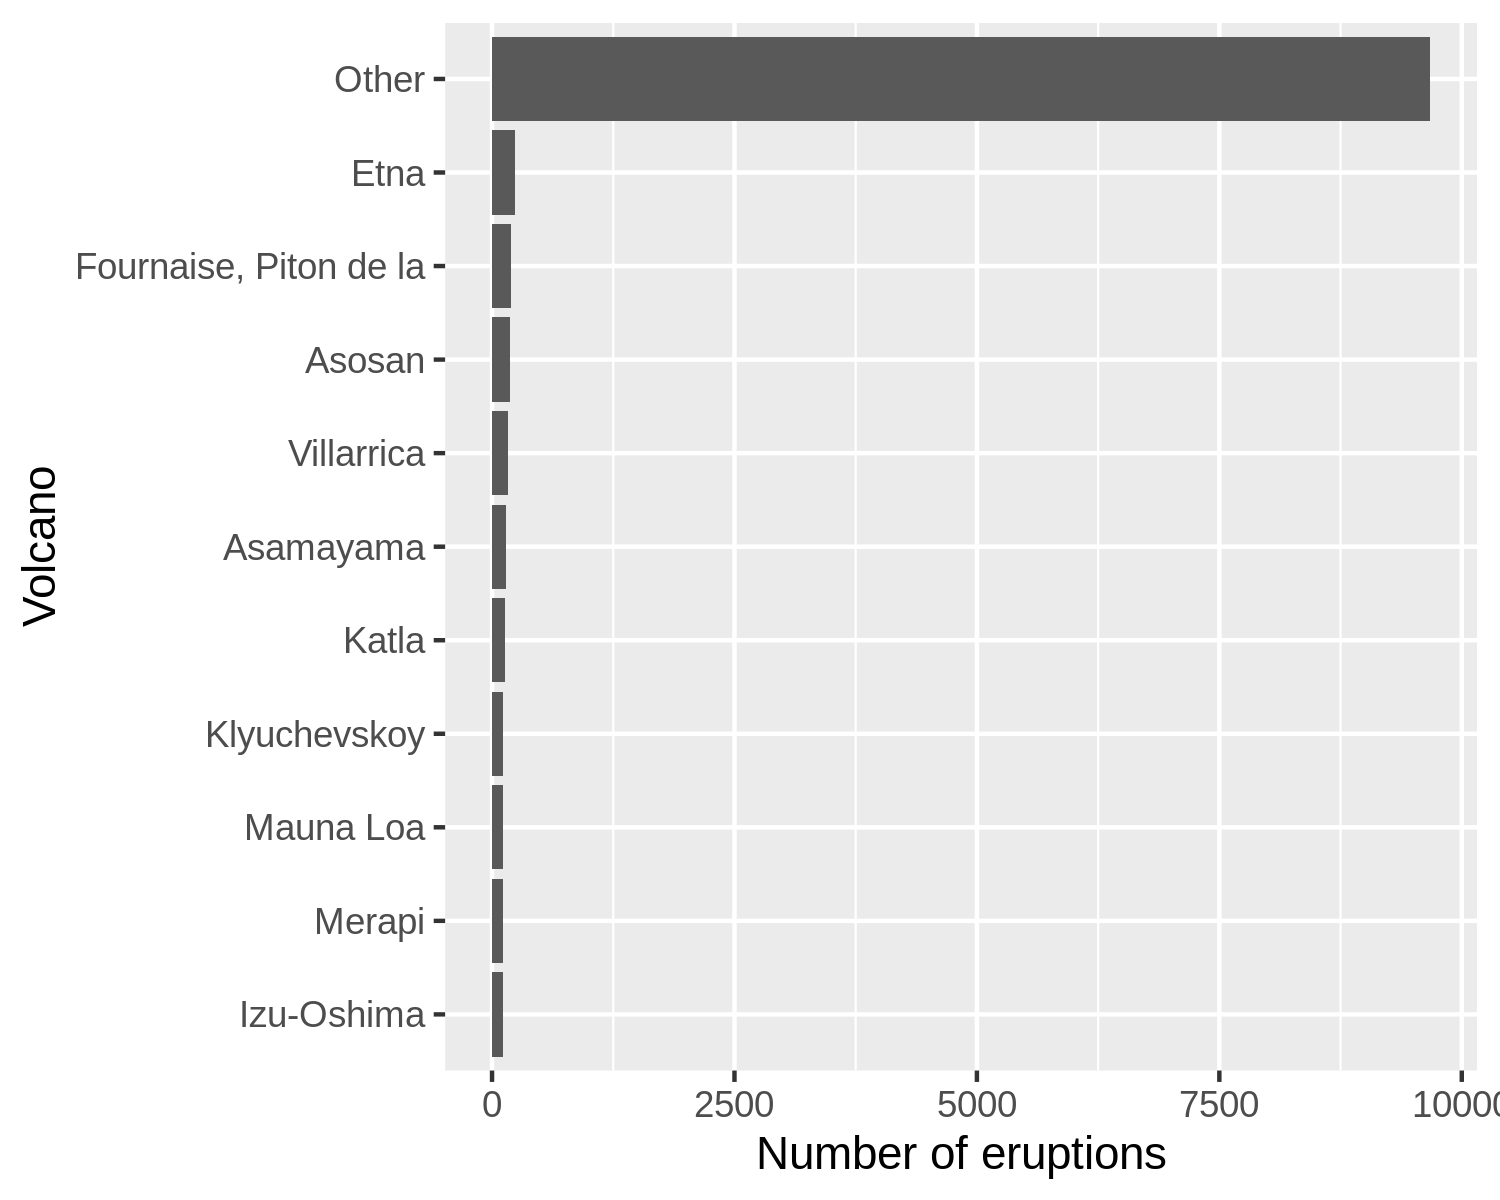

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

df_lumped = eruptions_df %>%
    mutate(volcano_lumped = volcano_name %>% fct_lump(n = 10)) 

p = ggplot(df_lumped, aes(y = volcano_lumped %>% fct_infreq() %>% fct_rev()))

p = p + geom_bar()

p = p + labs(y = 'Volcano', x = 'Number of eruptions')

p


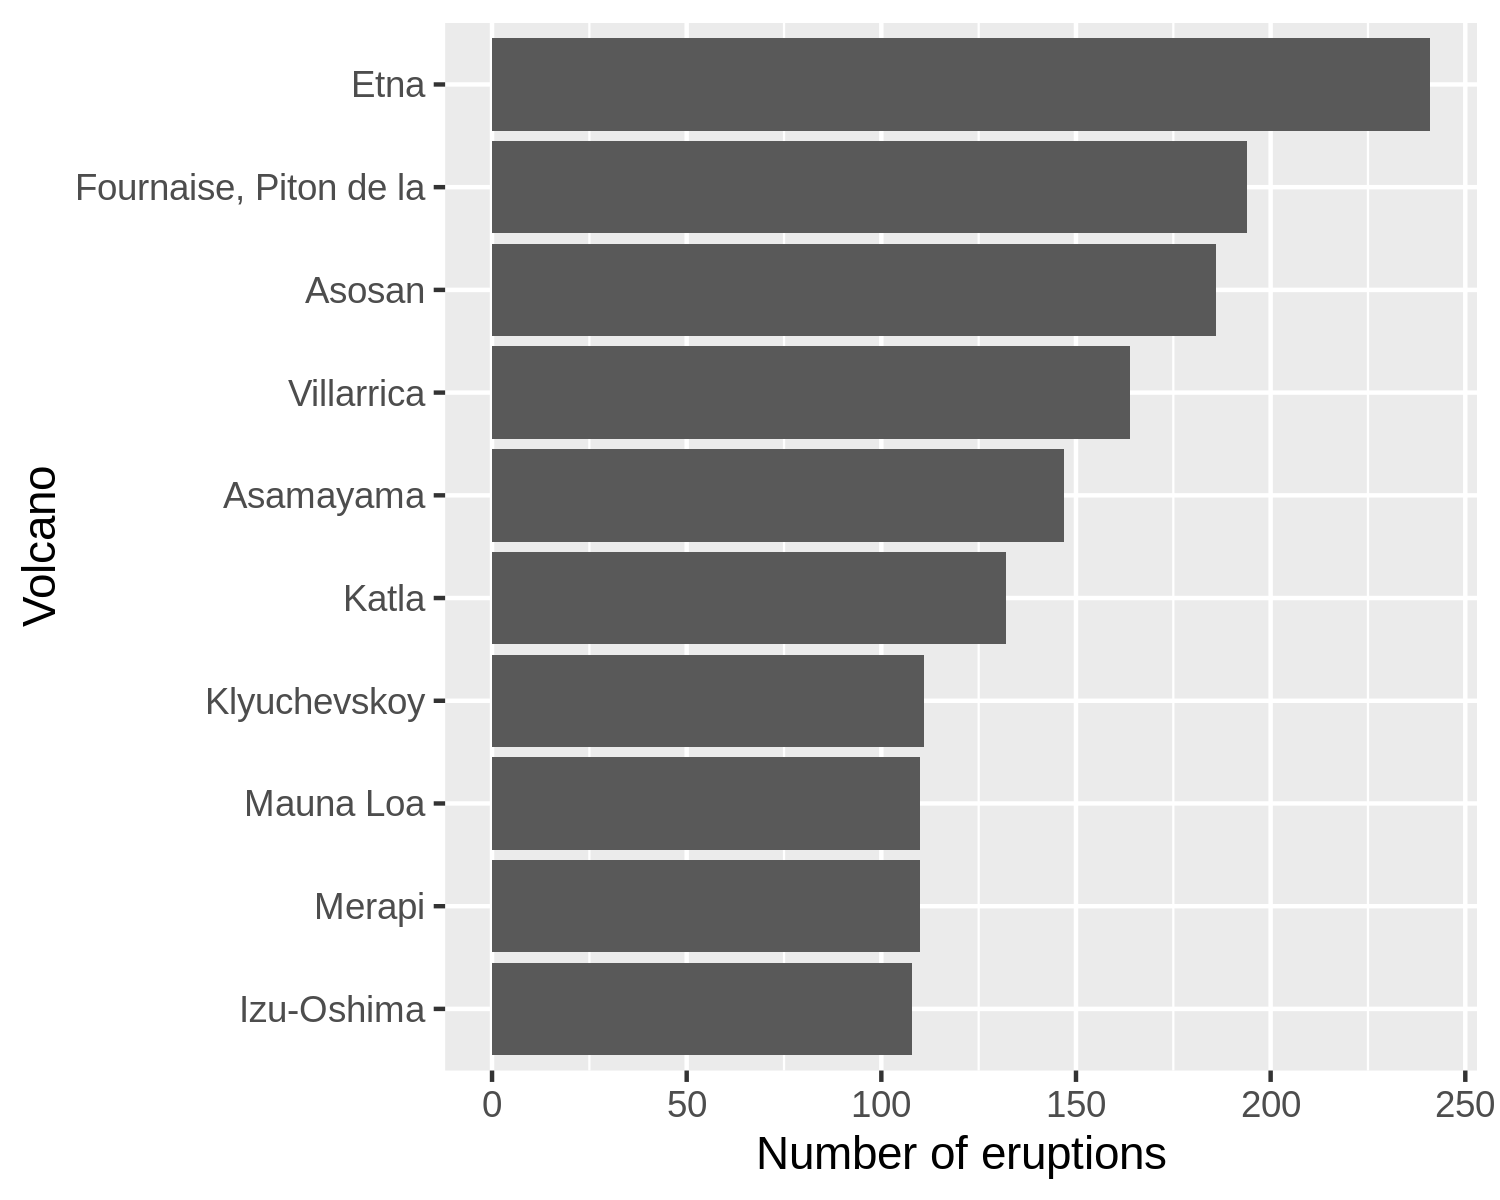

In [8]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

df_lumped = eruptions_df %>%
    mutate(volcano_lumped = volcano_name %>% 
    fct_lump(n = 10)) %>%
    filter(volcano_lumped != "Other")

#df_lumped$volcano_lumped

p2 = ggplot(df_lumped, aes(y = volcano_lumped %>% fct_infreq() %>% fct_rev()))

p2 = p2 + geom_bar()

p2 = p2 + labs(y = 'Volcano', x = 'Number of eruptions')

p2

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



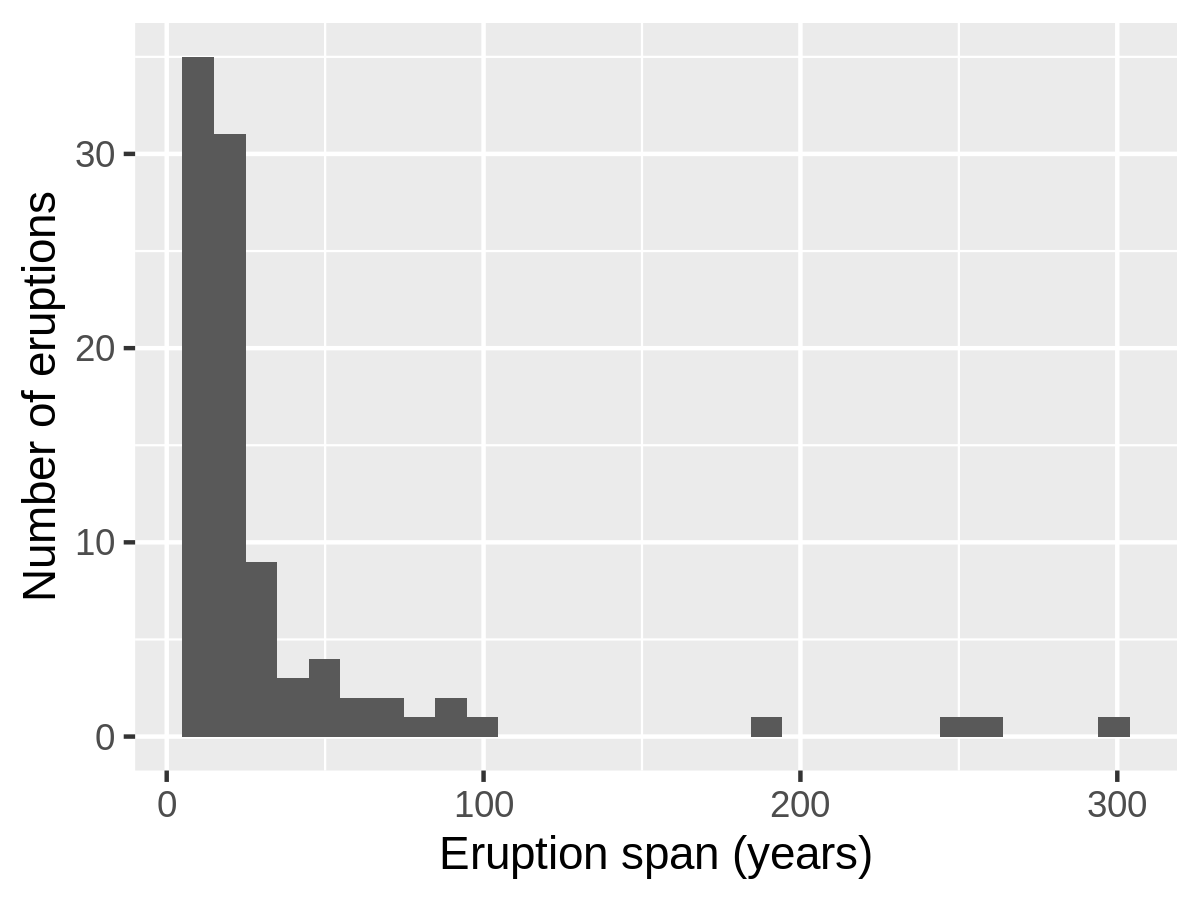

In [9]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

span_df = eruptions_df %>%
    mutate(eruption_span = end_year - start_year) %>%
    filter(eruption_span>=10) 

p3 = ggplot(span_df, aes(x=eruption_span))

p3 = p3 + geom_histogram()

p3 = p3 + labs(x = "Eruption span (years)", y = "Number of eruptions")

p3

In [10]:
top_n(span_df, 1, eruption_span)

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude,eruption_span
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211040,Stromboli,13425,Confirmed Eruption,Summit craters and Sciara del Fuoco,3,1558,0,0,Historical Observations,1857,0,0,38.789,15.213,299


#### The volcano with the longest eruption span is Stromboli, with an eruption span of 299 years.